In [66]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import regularizers
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [67]:
train = pd.read_csv('Titanic_Train.csv')
x_labels = train['Survived']
x_train = train.drop(columns=['Survived', 'Cabin', 'Name', 'Ticket'])

test = pd.read_csv('Titanic_Test.csv')
#y_labels = test['Survived']
y_train = test.drop(columns=['Cabin', 'Name', 'Ticket'])


In [68]:
x_train.isna().sum()
x_train.fillna(x_train.mean(), inplace = True)
x_train.isna().sum()

y_train.fillna(y_train.mean(), inplace=True)
#values = {'Embarked': 'C'}
#x_train.fillna(value = values)

#x_train.fillna({'Embarked':'C'})
#x_train.fillna(x_train.median())

In [69]:
y_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [70]:
x_labels.tail(10)

881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [71]:
#One hot encoding Pclass
x_train['Upper'] = (x_train['Pclass'] == 1)*1.0
x_train['Middle'] = (x_train['Pclass'] == 2)*1.0
x_train['Lower'] = (x_train['Pclass'] == 3)*1.0
x_train = x_train.drop(columns='Pclass')

#One hot encoding Sex
x_train['Male'] = (x_train['Sex'] == 'male')*1.0
x_train['Female'] = (x_train['Sex'] == 'female')*1.0
x_train = x_train.drop(columns='Sex')

#One hot encoding Embarked
x_train['Emb_S'] = (x_train['Embarked'] == 'S')*1.0
x_train['Emb_C'] = (x_train['Embarked'] == 'C')*1.0
x_train['Emb_Q'] = (x_train['Embarked'] == 'Q')*1.0
x_train['Emb_Nan'] = (x_train['Embarked'] == '')*1.0
x_train = x_train.drop(columns='Embarked')

#One hot encoding Pclass
y_train['Upper'] = (y_train['Pclass'] == 1)*1.0
y_train['Middle'] = (y_train['Pclass'] == 2)*1.0
y_train['Lower'] = (y_train['Pclass'] == 3)*1.0
y_train = y_train.drop(columns='Pclass')

#One hot encoding Sex
y_train['Male'] = (y_train['Sex'] == 'male')*1.0
y_train['Female'] = (y_train['Sex'] == 'female')*1.0
y_train = y_train.drop(columns='Sex')

#One hot encoding Embarked
y_train['Emb_S'] = (y_train['Embarked'] == 'S')*1.0
y_train['Emb_C'] = (y_train['Embarked'] == 'C')*1.0
y_train['Emb_Q'] = (y_train['Embarked'] == 'Q')*1.0
y_train['Emb_Nan'] = (y_train['Embarked'] == '')*1.0
y_train = y_train.drop(columns='Embarked')



In [72]:
x_train.tail(10)

,PassengerId,Age,SibSp,Parch,Fare,Upper,Middle,Lower,Male,Female,Emb_S,Emb_C,Emb_Q,Emb_Nan
881,882,33.000000,0,0,7.8958,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
882,883,22.000000,0,0,10.5167,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
883,884,28.000000,0,0,10.5000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
884,885,25.000000,0,0,7.0500,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
885,886,39.000000,0,5,29.1250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
886,887,27.000000,0,0,13.0000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
887,888,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
888,889,29.699118,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
889,890,26.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
890,891,32.000000,0,0,7.7500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


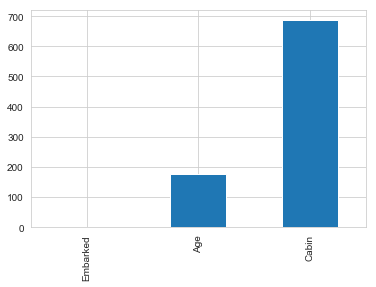

In [73]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [74]:
'''graph = x_train['Cabin']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(graph, kde=False, fit=stats.johnsonsu)
visual=pd.DataFrame(x_train)
visual[['Age', 'Fare']].head(200).plot.bar()'''

"graph = x_train['Cabin']\nplt.figure(1); plt.title('Johnson SU')\nsns.distplot(graph, kde=False, fit=stats.johnsonsu)\nvisual=pd.DataFrame(x_train)\nvisual[['Age', 'Fare']].head(200).plot.bar()"

In [75]:
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu),
    #keras.layers.Dropout(0.10),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu), 
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [77]:
x_train = np.array(x_train)
x_labels = np.array(x_labels)
y_train = np.array(y_train)
len(y_train)

418

In [78]:
#early_stop = keras.callbacks.EarlyStopping(monitor='acc', patience = 4)


#model.fit(x_train, x_labels, epochs=40, batch_size=2, callbacks=[early_stop])
model.fit(x_train, x_labels, epochs=50, batch_size=2)

Epoch 1/50
891/891 [==============================] - 1s 918us/sample - loss: 1.3144 - acc: 0.6072
Epoch 2/50
891/891 [==============================] - 1s 581us/sample - loss: 0.9415 - acc: 0.5982
Epoch 3/50
891/891 [==============================] - 1s 589us/sample - loss: 0.6926 - acc: 0.6319
Epoch 4/50
891/891 [==============================] - 1s 592us/sample - loss: 0.6743 - acc: 0.6375s - loss: 0.5929 - acc
Epoch 5/50
891/891 [==============================] - 1s 601us/sample - loss: 0.6577 - acc: 0.6689
Epoch 6/50
891/891 [==============================] - 1s 591us/sample - loss: 0.6029 - acc: 0.6801
Epoch 7/50
891/891 [==============================] - 1s 596us/sample - loss: 0.5970 - acc: 0.6936
Epoch 8/50
891/891 [==============================] - 1s 594us/sample - loss: 0.5941 - acc: 0.6958
Epoch 9/50
891/891 [==============================] - 1s 596us/sample - loss: 0.5805 - acc: 0.7048
Epoch 10/50
891/891 [==============================] - 1s 606us/sample - loss: 0.5796 -

In [79]:
import math
predictions = model.predict(y_train)
predictions = pd.DataFrame((predictions.round()))


predictions.columns=['Survived']

def array():
    array=[]
    for i in range(892,1310):
        array.append(i)
    return array

predictions['PassengerId'] = array()
predictions = predictions[['PassengerId', 'Survived']]
predictions.astype(int)
predictions.to_csv('Titanic_Result_5', index=False, float_format='%.0f')
predictions

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,1.0
7,899,0.0
8,900,1.0
9,901,0.0
